In [18]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### Data collection

In [2]:
df = pd.read_csv("dataset/car-data.csv")

In [3]:
df.head(n=10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [4]:
# no. of rows & columns
df.shape

(301, 9)

### Check for missing values

In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### Categorical data distribution

In [7]:
print(df.Fuel_Type.value_counts())
print('---'*30)
print(df.Seller_Type.value_counts())
print('---'*30)
print(df.Transmission.value_counts())
print('---'*30)

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
------------------------------------------------------------------------------------------
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
------------------------------------------------------------------------------------------
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
------------------------------------------------------------------------------------------


### Label encoding

In [10]:
# Fuel_Type column
df.replace(
    {
        "Fuel_Type": {
            "Petrol": 0, 
            "Diesel": 1,
            "CNG": 2
        }
    },
    inplace=True,
)

# Seller_Type column
df.replace(
    {
        "Seller_Type": {
            "Dealer": 0, 
            "Individual": 1,
        }
    },
    inplace=True,
)

# Transmission column
df.replace(
    {
        "Transmission": {
            "Manual": 0, 
            "Automatic": 1,
        }
    },
    inplace=True,
)

In [11]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### Separate features & columns

In [12]:
X = df.drop(["Car_Name", "Selling_Price"], axis=1)
y = df["Selling_Price"]

In [13]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

### Splitting dataset into training and testing data 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

### Training regression model

In [16]:
model = LinearRegression()

In [17]:
model.fit(X_train, y_train)

LinearRegression()

In [19]:
training_data_prediction = model.predict(X_train)

#### R-squared error

In [20]:
error_score = r2_score(y_train, training_data_prediction)
print(f"R-squared error: {error_score}")

R-squared error: 0.8799451660493711


### Data visualization

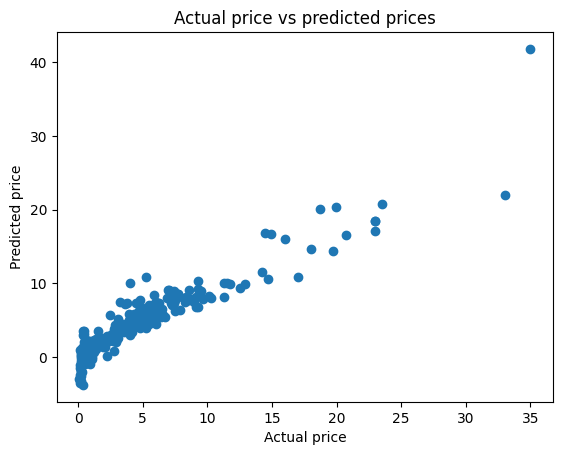

In [21]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs predicted prices")
plt.show()

#### Testing data prediction

In [22]:
# prediction of testing data
test_data_prediction = model.predict(X_test)

#### R-squared error

In [23]:
error_score = r2_score(y_test, test_data_prediction)
print(f"R-square error: {error_score}")

R-square error: 0.8365766715027051


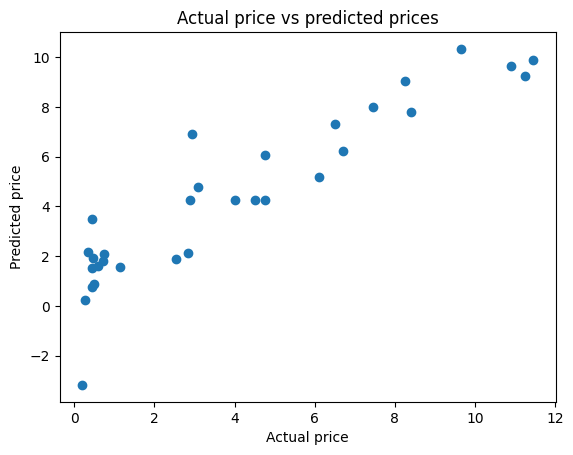

In [24]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs predicted prices")
plt.show()

### 2. Training Lasso Regression model

In [25]:
lasso_model = Lasso()

In [26]:
lasso_model.fit(X_train, y_train)

Lasso()

In [27]:
training_data_prediction = lasso_model.predict(X_train)

#### R-squared error

In [28]:
error_score = r2_score(y_train, training_data_prediction)
print(f"R-squared error: {error_score}")

R-squared error: 0.8427856123435794


### Data visualization

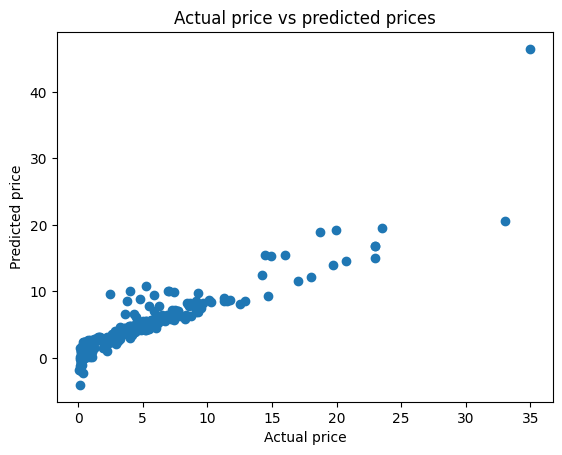

In [29]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs predicted prices")
plt.show()

#### Testing data prediction

In [30]:
# prediction of testing data
test_data_prediction = lasso_model.predict(X_test)

#### R-squared error

In [31]:
error_score = r2_score(y_test, test_data_prediction)
print(f"R-square error: {error_score}")

R-square error: 0.8709167941173195


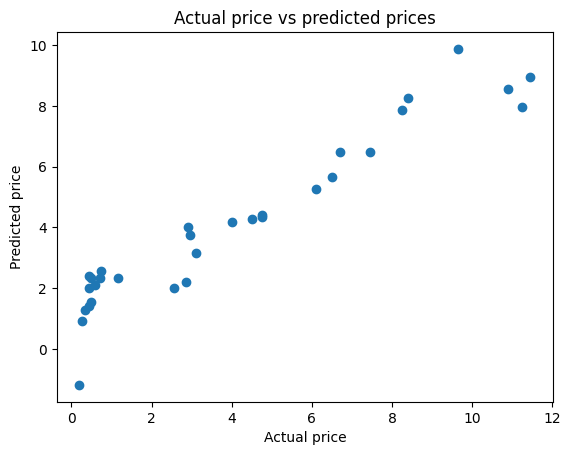

In [32]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs predicted prices")
plt.show()